In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

In [44]:
master = pd.read_csv('data/crimes_nat_tinker.csv')
master.drop(['Unnamed: 0','Unnamed: 0.1','SHOOTING'],axis=1,inplace=True)
master = pd.get_dummies(master, columns=['DAY_OF_WEEK','MONTH'])
master.neighborhood_avg = np.log(master.neighborhood_avg)
master.closest_property_value = np.log(master.closest_property_value)
master.head()

,Lat,Long,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,category,police_min_dist,police_density,hospital_min_dist,hospital_density,school_min_dist,school_density,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,42.259518,-71.121563,9,59.0,0.00,0.0,13.025852,12.996051,0.001234,563.0,theft,0.004067,1.0,0.041388,0.0,0.004665,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,42.262092,-71.116710,20,56.0,0.01,0.0,13.201729,13.023400,0.000539,531.0,theft,0.009414,1.0,0.036018,0.0,0.001244,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,42.352375,-71.135096,15,56.0,0.01,0.0,12.468052,13.287047,0.000167,1272.0,theft,0.015767,0.0,0.010692,0.0,0.002624,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,42.349476,-71.076402,4,56.0,0.01,0.0,13.106234,14.326388,0.000074,4461.0,theft,0.012329,0.0,0.012304,0.0,0.001918,6.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,42.381846,-71.066551,8,71.0,0.22,0.0,13.637460,13.313802,0.000108,2672.0,theft,0.011801,0.0,0.016170,0.0,0.002848,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
X, y = master.drop(['category'], axis=1), master['category']

In [46]:
def test_rf(best_depth):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = RandomForestClassifier(n_estimators=int(X_train.shape[1]/2), max_depth=best_depth)
    model.fit(X_train, y_train)

    #Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    #Perfromance Evaluation
    acc_random_forest_training = accuracy_score(y_train, y_pred_train)*100
    acc_random_forest_testing = accuracy_score(y_test, y_pred_test)*100

    print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_random_forest_training))
    print("Random Forest: Accuracy, Testing Set :  {:0.2f}%".format(acc_random_forest_testing))

In [47]:
test_rf(15)

Random Forest: Accuracy, Training Set : 45.45%
Random Forest: Accuracy, Testing Set :  27.32%


In [48]:
test_rf(10)

Random Forest: Accuracy, Training Set : 28.01%
Random Forest: Accuracy, Testing Set :  25.54%


In [49]:
test_rf(20)

Random Forest: Accuracy, Training Set : 79.30%
Random Forest: Accuracy, Testing Set :  28.44%


In [53]:
41867 / sum(master.category.value_counts())

0.17008112642641546

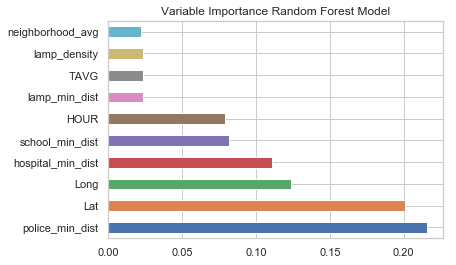

In [54]:
fig, ax = plt.subplots()
feat_import_tree20 = pd.Series(model.feature_importances_, index = X_train.columns)
feat_import_tree20.nlargest(10).plot(kind = 'barh', title = "Variable Importance Random Forest Model")